In [52]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
import pingouin as pg

%matplotlib inline

In [172]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from pathlib import Path
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

(array([36., 14., 21., 21., 14.,  3.,  6.,  3.,  0.,  1.]),
 array([  0. ,  19.5,  39. ,  58.5,  78. ,  97.5, 117. , 136.5, 156. ,
        175.5, 195. ]),
 <a list of 10 Patch objects>)

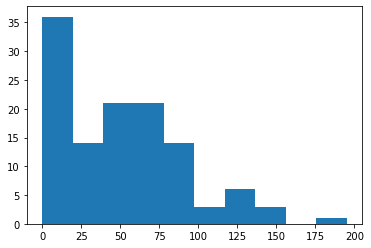

In [2]:
fcon=pd.read_csv("/Users/tientong/Documents/oleary/rest/finaldfex.txt",sep="\t")
fcon_ses1 = fcon[fcon['ses_ord'] == 1]
fcon_ses2 = fcon[fcon['ses_ord'] == 2]

fcon_ses1_ge = fcon_ses1[fcon_ses1['time2_scanner'] == 'ge']
fcon_ses1_ge.reset_index(drop = True, inplace = True)

fcon_ses1_si = fcon_ses1[fcon_ses1['time2_scanner'] == 'siemens']
fcon_ses1_si.reset_index(drop = True, inplace = True)

fcon_ses2_ge = fcon_ses2[fcon_ses2['time2_scanner'] == 'ge']
fcon_ses2_ge.reset_index(drop = True, inplace = True)

fcon_ses2_si = fcon_ses2[fcon_ses2['time2_scanner'] == 'siemens']
fcon_ses2_si.reset_index(drop = True, inplace = True)

plt.hist(fcon_ses1['sum.sbinge'])

(array([81., 18., 10.,  4.,  3.,  2.,  0.,  0.,  0.,  1.]),
 array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160.]),
 <a list of 10 Patch objects>)

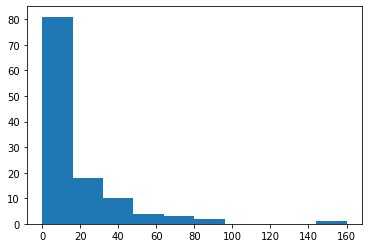

In [3]:
plt.hist(fcon_ses1['sum.ebinge'])

In [4]:
mat_allsub_ses1_ge = np.zeros((98, 300, 300))
mat_allsub_ses2_ge = np.zeros((98, 300, 300))

mat_allsub_ses1_si = np.zeros((21, 300, 300))
mat_allsub_ses2_si = np.zeros((21, 300, 300))

In [5]:
# Read txt file (300x300 z-transformed correlation matrix for each subject) 

mat_allsub_ses1_ge = {}
mat_allsub_ses2_ge = {}

mat_allsub_ses1_si = {}
mat_allsub_ses2_si = {}


pathge = "/Users/tientong/Documents/oleary/rest/all_twovisitGE/derivatives/"
for i in range(98):  
    df = pd.read_table(pathge + str(fcon_ses1_ge.loc[i,'id']) + '_' + str(fcon_ses1_ge.loc[i,'ses']) + '.txt', 
                       index_col=0)
    mat_allsub_ses1_ge[str(fcon_ses1_ge.loc[i,'id'])] = pd.DataFrame.to_numpy(df)
    
for i in range(98):  
    df = pd.read_table(pathge + str(fcon_ses2_ge.loc[i,'id']) + '_' + str(fcon_ses2_ge.loc[i,'ses']) + '.txt', 
                       index_col=0)
    mat_allsub_ses2_ge[str(fcon_ses2_ge.loc[i,'id'])] = pd.DataFrame.to_numpy(df)
    
pathsi = "/Users/tientong/Documents/oleary/rest/all_twovisitSiemens/derivatives/"
for i in range(21):  
    df = pd.read_table(pathsi + str(fcon_ses1_si.loc[i,'id']) + '_' + str(fcon_ses1_si.loc[i,'ses']) + '.txt', 
                       index_col=0)
    mat_allsub_ses1_si[str(fcon_ses1_si.loc[i,'id'])] = pd.DataFrame.to_numpy(df)

for i in range(21):  
    df = pd.read_table(pathsi + str(fcon_ses2_si.loc[i,'id']) + '_' + str(fcon_ses2_si.loc[i,'ses']) + '.txt', 
                       index_col=0)
    mat_allsub_ses2_si[str(fcon_ses2_si.loc[i,'id'])] = pd.DataFrame.to_numpy(df)    

In [114]:
# calculate fcon change ses2 - ses1
mat_allsub_ge = {}
for i in mat_allsub_ses1_ge.keys():
    mat_allsub_ge[i] = np.subtract(mat_allsub_ses2_ge[i], mat_allsub_ses1_ge[i])
    
mat_allsub_si = {}
for i in mat_allsub_ses1_si.keys():
    mat_allsub_si[i] = np.subtract(mat_allsub_ses2_si[i], mat_allsub_ses1_si[i])

# merge
mat_allsub = {}
for i in mat_allsub_ge.keys():
    mat_allsub[i] = mat_allsub_ge[i]

for j in mat_allsub_si.keys():
    mat_allsub[j] = mat_allsub_si[j]

# Create FCON dataframe
# flat upper triangle for each subject, then turn to pd dataframe
flattriu = {}
for i in mat_allsub.keys():  
    flattriu[i] = mat_allsub[i][np.triu_indices(300, k=1)]
    
flattriu_df = pd.DataFrame.from_dict(flattriu, orient='index').sort_index()
flattriu_df.columns = flattriu_df.columns.astype(str)
flattriu_df.index.name = 'id'
flattriu_df.index = flattriu_df.index.astype('str')

# Create CONFOUNDs dataframe
fcon_ses2_newindex = fcon_ses2.set_index('id')
fcon_ses2_newindex.index = fcon_ses2_newindex.index.astype('str')
fcon_ses2_subset = fcon_ses2_newindex[['sum.sbinge', 'sum.ebinge', 'sum.cannabis', 'sum.tobacco',
                   'sd.sbinge', 'sd.ebinge', 'sd.cannabis', 'sd.tobacco',
                   'age', 'sex', 'V1_ParentSES', 'fd']]

# Create FCON and CONFOUNDs dataframe
full_df=pd.merge(flattriu_df, fcon_ses2_subset, on='id')

full_df.to_csv('full_df.csv', sep=',', index = True, header = True)
fcon_ses2_newindex.to_csv('confound_df.csv', sep=',', index = True, header = True)
flattriu_df.to_csv('flattriu_df.csv', sep=',', index = True, header = True)

In [123]:
temp=full_df[['0', 'sum.sbinge', 'age', 'sex', 'fd']].dropna()
full_df['sex'] = full_df['sex'].replace('Male', 1)
full_df['sex'] = full_df['sex'].replace('Female', 2)

In [135]:
# calculate partial correlation between fcon and bingeing, 
# covarying out age + sex + V1_ParentSES + fd 
# QUESTION: control for baseline binge?? maybe later

#pg.partial_corr(data=full_df, x='0', y='sum.sbinge', covar=['age', 'sex', 'fd'], method='spearman')
#pg.partial_corr(data=full_df[['0', 'sum.sbinge', 'age', 'sex', 'fd']].dropna(), 
#                x='0', y='sum.sbinge', covar=['sex'], method='spearman')

pg.partial_corr(data=full_df[['0', 'sum.sbinge', 'age', 'sex', 'fd']].dropna(), 
                x='0', y='sum.sbinge', covar=['age', 'sex', 'fd'], method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,119,0.098049,"[-0.08, 0.27]",0.009614,-0.007462,0.288756,0.186045


In [136]:
pg.partial_corr(data=full_df[['0', 'sum.sbinge', 'age', 'sex', 'fd']].dropna(), 
                x='0', y='sum.sbinge', covar=['age', 'sex', 'fd'], method='spearman')["p-val"]

spearman    0.288756
Name: p-val, dtype: float64

In [153]:
pval = {}

for i in range(44846):
    temp = full_df[[str(i), 'sum.sbinge', 'age', 'sex', 'fd']].dropna()
    if len(temp) >= 3:
        pval[str(i)] = pg.partial_corr(data=temp, x=str(i), y='sum.sbinge', 
                                       covar=['age', 'sex', 'fd'], method='spearman').loc["spearman","p-val"]
    else:
        pval[str(i)] = np.NaN

In [154]:
spearmanr = {}
for i in range(44846):
    temp = full_df[[str(i), 'sum.sbinge', 'age', 'sex', 'fd']].dropna()
    if len(temp) >= 3:
        spearmanr[str(i)] = pg.partial_corr(data=temp, x=str(i), y='sum.sbinge', 
                                       covar=['age', 'sex', 'fd'], method='spearman').loc["spearman","r"]
    else:
        spearmanr[str(i)] = np.NaN

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

In [170]:
no_egde=0
for i in pval.values():
    if i < 0.05:
        no_egde += 1
no_egde        

2284

# Test

In [330]:
def mk_kfold_indices(subj_list, k = 10):
    """
    Splits list of subjects into k folds for cross-validation.
    """
    
    n_subs = len(subj_list)
    n_subs_per_fold = n_subs//k # floor integer for n_subs_per_fold

    indices = [[fold_no]*n_subs_per_fold for fold_no in range(k)] # generate repmat list of indices
    remainder = n_subs % k # figure out how many subs are left over
    remainder_inds = list(range(remainder))
    indices = [item for sublist in indices for item in sublist]    
    [indices.append(ind) for ind in remainder_inds] # add indices for remainder subs

    assert len(indices)==n_subs, "Length of indices list does not equal number of subjects, something went wrong"

    np.random.shuffle(indices) # shuffles in place

    return np.array(indices)

In [331]:
def split_train_test(subj_list, indices, test_fold):
    """
    For a subj list, k-fold indices, and given fold, returns lists of train_subs and test_subs
    """

    train_inds = np.where(indices!=test_fold)
    test_inds = np.where(indices==test_fold)

    train_subs = []
    for sub in subj_list[train_inds]:
        train_subs.append(sub)

    test_subs = []
    for sub in subj_list[test_inds]:
        test_subs.append(sub)

    return (train_subs, test_subs)

In [332]:
def get_train_test_data(all_fc_data, train_subs, test_subs, behav_data, behav):

    """
    Extracts requested FC and behavioral data for a list of train_subs and test_subs
    """

    train_vcts = all_fc_data.loc[train_subs, :]
    test_vcts = all_fc_data.loc[test_subs, :]

    train_behav = behav_data.loc[train_subs, behav]

    return (train_vcts, train_behav, test_vcts)

In [333]:
def select_features(train_vcts, train_behav, r_thresh=0.3, corr_type='pearson', verbose=False):
    
    """
    Runs the CPM feature selection step: 
    - correlates each edge with behavior, and returns a mask of edges that are correlated above some threshold, one for each tail (positive and negative)
    """

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    # Correlate all edges with behav vector
    if corr_type =='pearson':
        cov = np.dot(train_behav.T - train_behav.mean(), train_vcts - train_vcts.mean(axis=0)) / (train_behav.shape[0]-1)
        corr = cov / np.sqrt(np.var(train_behav, ddof=1) * np.var(train_vcts, axis=0, ddof=1))
    elif corr_type =='spearman':
        corr = []
        for edge in train_vcts.columns:
            r_val = sp.stats.spearmanr(train_vcts.loc[:,edge], train_behav)[0]
            corr.append(r_val)

    # Define positive and negative masks
    mask_dict = {}
    pos = np.array(corr) > r_thresh
    mask_dict["pos"] = pos.tolist()
    neg = np.array(corr) < -r_thresh
    mask_dict["neg"] = neg.tolist()
    
    if verbose:
        print("Found ({}/{}) edges positively/negatively correlated with behavior in the training set".format(mask_dict["pos"].sum(), mask_dict["neg"].sum())) # for debugging

    return mask_dict

In [334]:
def build_model(train_vcts, mask_dict, train_behav):
    """
    Builds a CPM model:
    - takes a feature mask, sums all edges in the mask for each subject, and uses simple linear regression to relate summed network strength to behavior
    """

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    model_dict = {}

    # Loop through pos and neg tails
    X_glm = np.zeros((train_vcts.shape[0], len(mask_dict.items())))

    t = 0
    for tail, mask in mask_dict.items():
        X = train_vcts.values[:, mask].sum(axis=1)
        X_glm[:, t] = X
        y = train_behav
        (slope, intercept) = np.polyfit(X, y, 1)
        model_dict[tail] = (slope, intercept)
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    model_dict["glm"] = tuple(np.linalg.lstsq(X_glm, y, rcond=None)[0])

    return model_dict

In [335]:
def apply_model(test_vcts, mask_dict, model_dict):
    """
    Applies a previously trained linear regression model to a test set to generate predictions of behavior.
    """

    behav_pred = {}

    X_glm = np.zeros((test_vcts.shape[0], len(mask_dict.items())))

    # Loop through pos and neg tails
    t = 0
    for tail, mask in mask_dict.items():
        X = test_vcts.loc[:, mask].sum(axis=1)
        X_glm[:, t] = X

        slope, intercept = model_dict[tail]
        behav_pred[tail] = slope*X + intercept
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    behav_pred["glm"] = np.dot(X_glm, model_dict["glm"])

    return behav_pred

OK, now let's put all that together in a "wrapper" function that will go through and perform a full k-fold cross-validated CPM analysis:

In [336]:
def cpm_wrapper(all_fc_data, all_behav_data, behav, k=10, **cpm_kwargs):

    assert all_fc_data.index.equals(all_behav_data.index), "Row (subject) indices of FC vcts and behavior don't match!"

    subj_list = all_fc_data.index # get subj_list from df index
    
    indices = mk_kfold_indices(subj_list, k=k)
    
    # Initialize df for storing observed and predicted behavior
    col_list = []
    for tail in ["pos", "neg", "glm"]:
        col_list.append(behav + " predicted (" + tail + ")")
    col_list.append(behav + " observed")
    behav_obs_pred = pd.DataFrame(index=subj_list, columns = col_list)
    
    # Initialize array for storing feature masks
    n_edges = all_fc_data.shape[1]
    all_masks = {}
    all_masks["pos"] = np.zeros((k, n_edges))
    all_masks["neg"] = np.zeros((k, n_edges))
    
    for fold in range(k):
        print("doing fold {}".format(fold))
        train_subs, test_subs = split_train_test(subj_list, indices, test_fold=fold)
        train_vcts, train_behav, test_vcts = get_train_test_data(all_fc_data, train_subs, test_subs, all_behav_data, behav=behav)
        mask_dict = select_features(train_vcts, train_behav, **cpm_kwargs)
        all_masks["pos"][fold,:] = mask_dict["pos"]
        all_masks["neg"][fold,:] = mask_dict["neg"]
        model_dict = build_model(train_vcts, mask_dict, train_behav)
        behav_pred = apply_model(test_vcts, mask_dict, model_dict)
        for tail, predictions in behav_pred.items():
            behav_obs_pred.loc[test_subs, behav + " predicted (" + tail + ")"] = predictions
            
    behav_obs_pred.loc[subj_list, behav + " observed"] = all_behav_data[behav]
    
    return behav_obs_pred, all_masks

# Run

In [337]:
all_fc_data = flattriu_df
all_behav_data = fcon_ses2_newindex

In [338]:
print(all_fc_data.shape)
print(all_behav_data.shape)
all_fc_data.index == all_behav_data.index

(119, 44850)
(119, 136)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

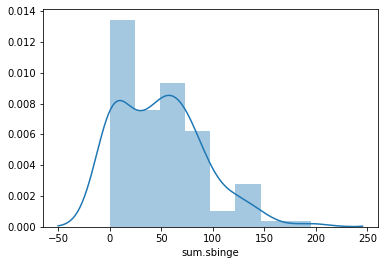

In [339]:
behav = 'sum.sbinge'

sns.distplot(all_behav_data[behav])
plt.show()

In [340]:
cpm_kwargs = {'r_thresh': 0.2, 'corr_type': 'spearman'}

behav_obs_pred, all_masks = cpm_wrapper(all_fc_data, all_behav_data, behav=behav, **cpm_kwargs)

doing fold 0


/Users/tientong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/Users/tientong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less


doing fold 1
doing fold 2
doing fold 3
doing fold 4
doing fold 5
doing fold 6
doing fold 7
doing fold 8
doing fold 9


In [341]:
behav_obs_pred.head()

,sum.sbinge predicted (pos),sum.sbinge predicted (neg),sum.sbinge predicted (glm),sum.sbinge observed
id,,,,
3003,64.5243,61.4772,66.3724,0
3004,49.4028,85.9215,70.4782,1
3005,60.5176,52.1353,58.1116,0
3006,39.8221,42.4657,39.5112,41
3009,49.8948,46.0977,48.1074,0


Now we'll make a function that makes pretty scatter plots of observed versus predicted behavior:

In [342]:
def plot_predictions(behav_obs_pred, tail="glm"):
    x = behav_obs_pred.filter(regex=("obs")).astype(float)
    y = behav_obs_pred.filter(regex=(tail)).astype(float)

    g = sns.regplot(x=x.T.squeeze(), y=y.T.squeeze(), color='gray')
    ax_min = min(min(g.get_xlim()), min(g.get_ylim()))
    ax_max = max(max(g.get_xlim()), max(g.get_ylim()))
    g.set_xlim(ax_min, ax_max)
    g.set_ylim(ax_min, ax_max)
    g.set_aspect('equal', adjustable='box')
    
    xflattened = [val for sublist in x.values.tolist() for val in sublist]
    yflattened = [val for sublist in y.values.tolist() for val in sublist]
    r = sp.stats.pearsonr(xflattened,yflattened)[0]
    g.annotate('r = {0:.2f}'.format(r), xy = (0.7, 0.1), xycoords = 'axes fraction')
    
    return g

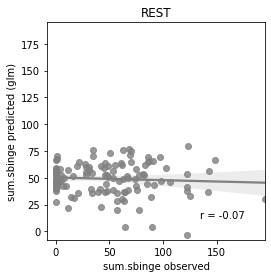

In [343]:
condition='REST'
g = plot_predictions(behav_obs_pred)
g.set_title(condition)
plt.show()

# Visualize edges

In [344]:
seizman_coords = pd.read_csv("network.txt", sep='\t', index_col='newindex', usecols=['newindex', 'x', 'y', 'z'])

In [345]:
from nilearn.plotting import plot_connectome

Now we define a function that will take in all_masks, calculate the consistency of each edge (i.e., how frequently it is selected across all k-fold iterations), and visualize only those edges that meet some consistency threshold (expressed as a percentage of times selected):

In [346]:
def plot_consistent_edges(all_masks, tail, thresh = 1., color='gray'):
    
    edge_frac = (all_masks[tail].sum(axis=0))/(all_masks[tail].shape[0])
    print("For the {} tail, {} edges were selected in at least {}% of folds".format(tail, (edge_frac>=thresh).sum(), thresh*100))
    edge_frac_square = sp.spatial.distance.squareform(edge_frac)

    node_mask = np.amax(edge_frac_square, axis=0) >= thresh # find nodes that have at least one edge that passes the threshold
    node_size = edge_frac_square.sum(axis=0)*node_mask*20 # size nodes based on how many suprathreshold edges they have

    plot_connectome(adjacency_matrix=edge_frac_square, edge_threshold=thresh,
                    node_color = color,
                    node_coords=seizman_coords, node_size=node_size,
                    display_mode= 'lzry',
                    edge_kwargs={"linewidth": 1, 'color': color})

For the pos tail, 179 edges were selected in at least 90.0% of folds


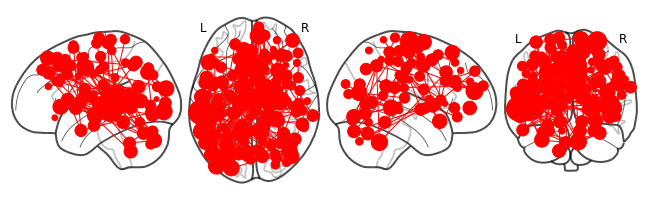

In [347]:
plot_consistent_edges(all_masks, "pos", thresh = 0.9, color = 'red')

For the neg tail, 151 edges were selected in at least 90.0% of folds


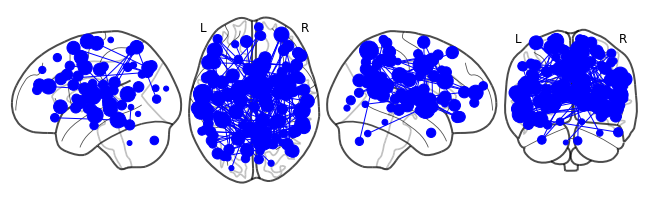

In [348]:
plot_consistent_edges(all_masks, "neg", thresh = 0.9, color = 'blue')

In [1]:
from nilearn.plotting import plot_connectome
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [4]:
seizman_coords = pd.read_csv("network_test.csv",header=None)
network = pd.read_csv("network.txt",sep='\t')

sbinge_pos = pd.read_csv("sbinge_0001_pos.csv",header=None)
sbinge_neg = pd.read_csv("sbinge_0001_neg.csv",header=None)
ebinge_pos = pd.read_csv("ebinge_0001_pos.csv",header=None)
ebinge_neg = pd.read_csv("ebinge_0001_neg.csv",header=None)

# assign color for each network
colors = []
random.seed(100000)
for i in range(14):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))
netname = np.unique(network['netName'])
for i in range(len(netname)):
    network.loc[network['netName']==netname[i], 'pythoncolor'] = colors[i]
node_color=list(network['pythoncolor'])
network.to_csv("network_new.txt", sep='\t', header=True)


def degree_thresh(inputdf, degree):
    idx_false=np.where(inputdf.sum(axis=0) < degree)[0]
    newdf = inputdf.copy()
    newdf.iloc[idx_false, idx_false] = 0
    return(newdf)

sbinge_pos_threshed = degree_thresh(inputdf = sbinge_pos, degree = 30)
sbinge_neg_threshed = degree_thresh(inputdf = sbinge_neg, degree = 30)

ebinge_pos_threshed = degree_thresh(inputdf = ebinge_pos, degree = 30)
ebinge_neg_threshed = degree_thresh(inputdf = ebinge_neg, degree = 30)


In [5]:
netname

array(['Auditory', 'CinguloOpercular', 'DefaultMode', 'DorsalAttention',
       'FrontoParietal', 'MedialTemporalLobe', 'ParietoMedial', 'Reward',
       'Salience', 'SomatomotorDorsal', 'SomatomotorLateral',
       'VentralAttention', 'Visual', 'unassigned'], dtype=object)

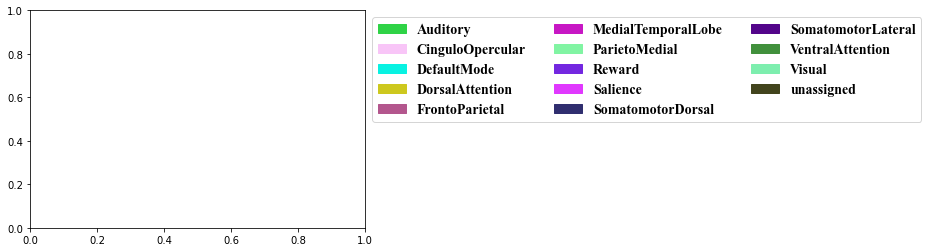

In [5]:
patch = []
for i in range(14):
    patch.append(mpatches.Patch(color=colors[i], label=netname[i]))
    
#del matplotlib.font_manager.weight_dict['roman']
#matplotlib.font_manager._rebuild()

# produce a legend for the objects in the other figure
font = matplotlib.font_manager.FontProperties(family='Times New Roman', size=14, weight='bold')
legend = plt.legend(prop=font, handles=patch, ncol=3, bbox_to_anchor=(1, 1), loc='upper left')


def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)

export_legend(legend)
plt.show()

In [4]:
plot_connectome(adjacency_matrix=sbinge_pos_threshed, node_coords=seizman_coords, 
                node_size=sbinge_pos_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'red'}, output_file='sbinge_pos.png')
plot_connectome(adjacency_matrix=ebinge_pos_threshed, node_coords=seizman_coords, 
                node_size=ebinge_pos_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'red'}, output_file='ebinge_pos.png')

plot_connectome(adjacency_matrix=sbinge_neg_threshed, node_coords=seizman_coords, 
                node_size=sbinge_neg_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'blue'}, output_file='sbinge_neg.png')
plot_connectome(adjacency_matrix=ebinge_neg_threshed, node_coords=seizman_coords, 
                node_size=ebinge_neg_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'blue'}, output_file='ebinge_neg.png')

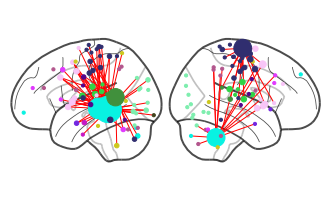

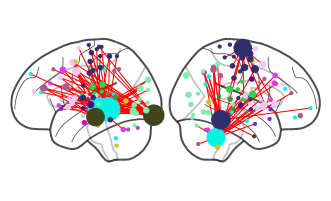

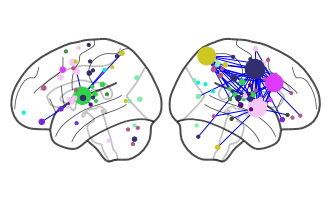

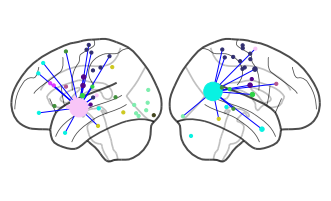

In [12]:
plot_connectome(adjacency_matrix=sbinge_pos_threshed, node_coords=seizman_coords, 
                node_size=sbinge_pos_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'red'})
plot_connectome(adjacency_matrix=ebinge_pos_threshed, node_coords=seizman_coords, 
                node_size=ebinge_pos_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'red'})

plot_connectome(adjacency_matrix=sbinge_neg_threshed, node_coords=seizman_coords, 
                node_size=sbinge_neg_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'blue'})
plot_connectome(adjacency_matrix=ebinge_neg_threshed, node_coords=seizman_coords, 
                node_size=ebinge_neg_threshed.sum(axis=0)*10, 
                node_color=node_color, display_mode= 'lr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'blue'})

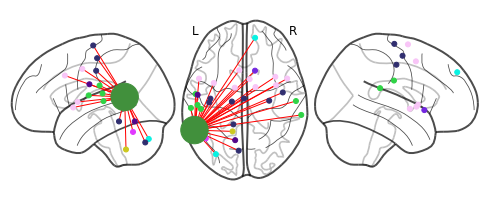

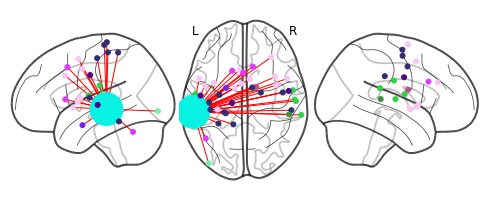

In [10]:
def degree_thresh(inputdf, degree):
    idx_false=np.where((inputdf.sum(axis=0) < degree) | (inputdf.sum(axis=0) > degree))[0]
    newdf = inputdf.copy()
    newdf.iloc[idx_false, idx_false] = 0
    return(newdf)

sbinge_pos_threshed = degree_thresh(inputdf = sbinge_pos, degree = 30)
plot_connectome(adjacency_matrix=sbinge_pos_threshed, node_coords=seizman_coords, 
                node_size=sbinge_pos_threshed.sum(axis=0)*25, 
                node_color=node_color, display_mode= 'lzr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'red'})
#plt.legend(prop=font, handles=patch, ncol=3, bbox_to_anchor=(1, 1), loc='upper left')



sbinge_pos_threshed = degree_thresh(inputdf = sbinge_pos, degree = 43)
plot_connectome(adjacency_matrix=sbinge_pos_threshed, node_coords=seizman_coords, 
                node_size=sbinge_pos_threshed.sum(axis=0)*25, 
                node_color=node_color, display_mode= 'lzr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'red'})
#plt.legend(prop=font, handles=patch, ncol=3, bbox_to_anchor=(1, 1), loc='upper left')

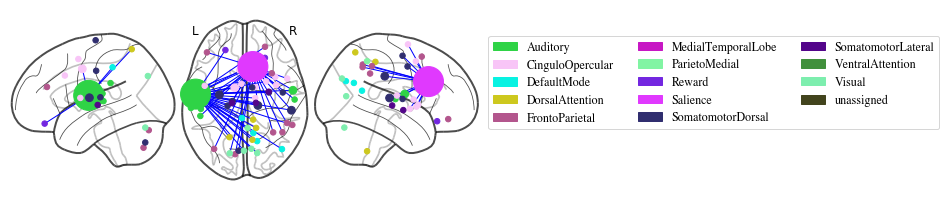

In [148]:
def degree_thresh(inputdf, degree):
    idx_false=np.where((inputdf.sum(axis=0) < degree) | (inputdf.sum(axis=0) > degree))[0]
    newdf = inputdf.copy()
    newdf.iloc[idx_false, idx_false] = 0
    return(newdf)

sbinge_neg_threshed = degree_thresh(inputdf = sbinge_neg, degree = 30)
plot_connectome(adjacency_matrix=sbinge_neg_threshed, node_coords=seizman_coords, 
                node_size=sbinge_neg_threshed.sum(axis=0)*30, 
                node_color=node_color, display_mode= 'lzr', annotate=True, 
                edge_kwargs={"linewidth": 1, 'color': 'blue'})
plt.legend(prop=font, handles=patch, ncol=3, bbox_to_anchor=(1, 1), loc='upper left')

In [131]:
flattriu_df

,0,1,2,3,4,5,6,7,8,9,...,44840,44841,44842,44843,44844,44845,44846,44847,44848,44849
id,,,,,,,,,,,,,,,,,,,,,
3003,0.4681,-0.2608,0.1966,0.5387,0.5964,0.2462,0.4858,0.4507,0.5824,0.4759,...,0.0400,-0.3324,-0.3484,0.2941,-0.0782,-0.2052,0.4130,-0.2167,0.0481,-0.1053
3004,-0.4959,0.0517,-0.1859,-0.5061,0.0013,-0.3238,-0.2918,-0.2830,-0.7836,-0.6249,...,0.0018,-0.4590,-0.7180,0.7128,0.0330,-0.3666,0.9347,-0.5252,0.1849,0.0424
3005,-0.1508,0.3283,-0.0156,0.7714,-0.4207,-0.0039,0.5376,-0.1622,0.3148,0.4487,...,-0.9593,-0.4357,-0.2504,-0.0475,-0.2485,-0.1777,-0.2169,0.2361,-0.0082,-0.0498
3006,-0.4790,-0.1801,-0.3654,-0.2664,0.0247,-0.0985,-0.2249,-0.4778,0.1548,-0.2230,...,0.4589,-0.7135,-0.6207,0.0324,-0.7870,-0.5267,0.0802,-0.1020,-0.3073,-0.3886
3009,0.1574,0.3073,0.4080,0.3361,0.7875,0.9661,0.6326,0.5283,0.5475,0.4097,...,-0.0578,0.0229,-0.0462,0.2476,0.0994,-0.0190,0.0643,-0.0266,0.4329,0.2033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,-0.2243,-0.3751,-0.2804,-0.4663,-0.3223,-0.3681,-0.2655,-0.0962,-0.0140,-0.4547,...,0.3565,0.1951,-0.1338,0.1283,0.1512,0.2401,0.3543,-0.3397,0.2339,0.2015
3206,0.0304,0.3263,0.5254,0.0058,-0.4251,-0.1454,-0.1523,-0.1326,-0.2381,0.2710,...,0.3435,-0.4218,-0.2834,-0.2331,-0.1582,0.0950,0.1537,-0.2850,-0.1175,-0.1209
3207,0.3839,0.9391,0.7672,-0.0926,0.8748,-0.4738,0.2622,0.1088,0.3310,1.3086,...,0.3376,-0.3380,-0.1309,-0.2683,0.0486,0.1502,0.3923,-0.3313,-0.9359,-0.3845
